In [ ]:
from modules.helper import (onMouse, showQRcorners, destroyQRcorners, get4Corners,
                            auto_ProcessImage, auto_ProcessImage_onlyfti,
                            auto_ProcessImage_onlyhand, setFullScreenCV)

In [ ]:
import cv2
import time


def control_camera(camera_index=0, brightness=None, contrast=None, saturation=None, hue=None, gain=None, exposure=None, auto_exposure=None, focus=None, auto_focus=None):
    """ 
    Opens a camera feed and allows control over various properties.

    Args:
        camera_index (int): The index of the camera to use (default: 0).
        brightness (float, optional): Brightness of the image (0.0 to 1.0). Defaults to None (no change).
        contrast (float, optional): Contrast of the image (0.0 to 1.0). Defaults to None (no change).
        saturation (float, optional): Saturation of the image (0.0 to 1.0). Defaults to None (no change).
        hue (float, optional): Hue of the image (-0.5 to 0.5 or 0 to 1 depending on backend). Defaults to None (no change).
        gain (float, optional): Gain of the image (0.0 to 1.0). Defaults to None (no change).
        exposure (float, optional): Exposure time. Value range depends on camera/backend. 
                                  Often requires auto_exposure to be turned off first. Defaults to None (no change).
                                  For V4L2 backend, it's often log_2(seconds), e.g., -7 for ~8ms.
        auto_exposure (int, optional): Enable/disable auto exposure. 1 for off, 3 for on (V4L2). 
                                       Check backend documentation. Defaults to None (no change).
        focus (float, optional): Focus value. Range depends on camera. Requires auto_focus off. Defaults to None (no change).
        auto_focus (int, optional): Enable/disable auto focus (0 for off, 1 for on). Defaults to None (no change).

    Note: 
        - Not all properties are supported by all cameras or backends (e.g., DirectShow, V4L2, MSMF).
        - Setting some properties (like exposure, focus) might require disabling their automatic counterparts first.
        - Property value ranges can vary significantly.
        - Shutter speed (cv2.CAP_PROP_SHUTTER_SPEED) is often not directly available or works differently.
          Exposure control (cv2.CAP_PROP_EXPOSURE) is more common.
    """
    cap = cv2.VideoCapture(camera_index)

    if not cap.isOpened():
        print(f"Error: Could not open camera {camera_index}")
        return

    # --- Set Properties ---
    # Note: Order might matter, e.g., disable auto modes first.
    if auto_exposure is not None:
        print(f"Setting Auto Exposure to: {auto_exposure}")
        cap.set(cv2.CAP_PROP_AUTO_EXPOSURE, auto_exposure)
        # Add a small delay for settings to apply if needed
        time.sleep(0.5)

    if auto_focus is not None:
        print(f"Setting Auto Focus to: {auto_focus}")
        cap.set(cv2.CAP_PROP_AUTOFOCUS, auto_focus)
        time.sleep(0.5)

    property_map = {
        cv2.CAP_PROP_BRIGHTNESS: brightness,
        cv2.CAP_PROP_CONTRAST: contrast,
        cv2.CAP_PROP_SATURATION: saturation,
        cv2.CAP_PROP_HUE: hue,
        cv2.CAP_PROP_GAIN: gain,
        cv2.CAP_PROP_EXPOSURE: exposure,
        cv2.CAP_PROP_FOCUS: focus
    }

    for prop_id, value in property_map.items():
        if value is not None:
            print(f"Setting property {prop_id} to: {value}")
            cap.set(prop_id, value)
            # Optional: Read back to confirm
            # print(f"  Read back value: {cap.get(prop_id)}")
            # time.sleep(0.1) # Small delay

    print("--- Current Camera Settings ---")
    print(f"Brightness: {cap.get(cv2.CAP_PROP_BRIGHTNESS)}")
    print(f"Contrast: {cap.get(cv2.CAP_PROP_CONTRAST)}")
    print(f"Saturation: {cap.get(cv2.CAP_PROP_SATURATION)}")
    print(f"Hue: {cap.get(cv2.CAP_PROP_HUE)}")
    print(f"Gain: {cap.get(cv2.CAP_PROP_GAIN)}")
    print(f"Exposure: {cap.get(cv2.CAP_PROP_EXPOSURE)}")
    print(f"Auto Exposure: {cap.get(cv2.CAP_PROP_AUTO_EXPOSURE)}")
    print(f"Focus: {cap.get(cv2.CAP_PROP_FOCUS)}")
    print(f"Auto Focus: {cap.get(cv2.CAP_PROP_AUTOFOCUS)}")
    print(f"Frame Width: {cap.get(cv2.CAP_PROP_FRAME_WIDTH)}")
    print(f"Frame Height: {cap.get(cv2.CAP_PROP_FRAME_HEIGHT)}")
    print(f"FPS: {cap.get(cv2.CAP_PROP_FPS)}")
    print("-----------------------------")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Can't receive frame (stream end?). Exiting ...")
            break

        # Display the resulting frame
        cv2.imshow('Camera Feed - Press Q to Quit', frame)

        # Exit loop if 'q' is pressed
        if cv2.waitKey(1) == ord('q'):
            break

    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()
    # Need this on some systems to ensure window closes properly
    for i in range(5):
        cv2.waitKey(1)

# --- Example Usage ---
# Simple view
# control_camera(0)

# Example: Try setting brightness and turning off auto exposure
# Note: Auto exposure value '1' might mean OFF for V4L2 backend. Check your camera/backend.
# Exposure value '-7' might correspond to ~8ms (log_2 scale). Adjust as needed.
# control_camera(camera_index=0, brightness=0.7, auto_exposure=1, exposure=-7)

# Example: Set focus manually (if supported)
# control_camera(camera_index=0, auto_focus=0, focus=0.1) # Focus value range varies


# Call the function to start the camera feed (uncomment one of the examples above)
print("Function defined. Call control_camera() with desired parameters to start.")
# control_camera(0) # Start with default settings

In [ ]:
control_camera(1, exposure=-100, auto_exposure=3, gain=0)

In [ ]:
from constant import *
from config import cfg
from modules.qrcode import QRCodeB
qr = QRCodeB(
    version=cfg['qr_version'],
    box_size=cfg['qr_box_size'],
    border=cfg['qr_border']
)
imgQRcorners = qr.create_image_big_qr_center(fullscreensize, 0.8, core_value_qr)
# cv2.namedWindow("imgQRcorners", cv2.WND_PROP_FULLSCREEN)
# cv2.setWindowProperty("imgQRcorners", cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
# cv2.imshow("imgQRcorners", imgQRcorners)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# Save the image to a file
cv2.imwrite("_temp/imgQRcorners_v2.png", imgQRcorners)

In [5]:
import numpy as np
import cv2
import time
import os

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open camera")
cap.set(cv2.CAP_PROP_FOURCC, cv2.VideoWriter_fourcc(*'MJPG'))
cap.set(cv2.CAP_DSHOW, 1)
cap.set(cv2.CAP_PROP_FPS, 30)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
cap.set(cv2.CAP_PROP_AUTOFOCUS, 1)
cap.set(cv2.CAP_PROP_FOCUS, 1.0)
cap.set(cv2.CAP_PROP_BRIGHTNESS, 0.6)
cap.set(cv2.CAP_PROP_EXPOSURE, -8)
cap.set(cv2.CAP_PROP_AUTO_EXPOSURE, 1)

cv2.namedWindow("Camera Config", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Camera Config", 600, 150)
cv2.createTrackbar("Exp2", "Camera Config", 100, 200, lambda x: None)
cv2.createTrackbar("AutoExp2", "Camera Config", 1, 3, lambda x: None)
cv2.createTrackbar("Brightness2", "Camera Config", 0, 255, lambda x: None)
cv2.createTrackbar("Contrast2", "Camera Config", 0, 255, lambda x: None)
cv2.createTrackbar("Saturation2", "Camera Config", 0, 255, lambda x: None)
cv2.imshow("Camera Config", np.zeros((150, 600), dtype=np.uint8))

# Set up window and mouse callback
caped_frame = None

# Show camera
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Can't receive frame (stream end?). Exiting ...")
        break
    
    # Configure camera settings
    raw_e2 = cv2.getTrackbarPos("Exp2", "Camera Config")
    e2 = raw_e2 / 10.0 - 10.0
    ae2 = cv2.getTrackbarPos("AutoExp2", "Camera Config")
    cap.set(cv2.CAP_PROP_EXPOSURE, e2)
    cap.set(cv2.CAP_PROP_AUTO_EXPOSURE, ae2)
    # pull brightness/contrast/saturation into cfg, then apply
    raw_b2 = cv2.getTrackbarPos("Brightness2", "Camera Config")
    cap.set(cv2.CAP_PROP_BRIGHTNESS, raw_b2)
    raw_c2 = cv2.getTrackbarPos("Contrast2", "Camera Config")
    cap.set(cv2.CAP_PROP_CONTRAST, raw_c2)
    raw_s2 = cv2.getTrackbarPos("Saturation2", "Camera Config")
    cap.set(cv2.CAP_PROP_SATURATION, raw_s2)

    # Display the resulting frame
    cv2.imshow('Camera Feed - Press Q to Quit', frame)

    # Exit loop if 'q' is pressed
    if cv2.waitKey(1) == ord('q'):
        break

    # If c pressed, capture image
    if cv2.waitKey(1) == ord('c'):
        caped_frame = frame.copy()
        cv2.imwrite("_temp/captured_image.jpg", frame)
        print("Image captured and saved as 'captured_image.jpg'")
        break

cap.release()
cv2.destroyAllWindows()

Image captured and saved as 'captured_image.jpg'


In [ ]:
caped_frame.shape

In [6]:
# Read the image
caped_frame = cv2.imread("_temp/captured_image.jpg")

In [7]:
# Convert RGB to BGR
caped_frame = cv2.cvtColor(caped_frame, cv2.COLOR_RGB2BGR)

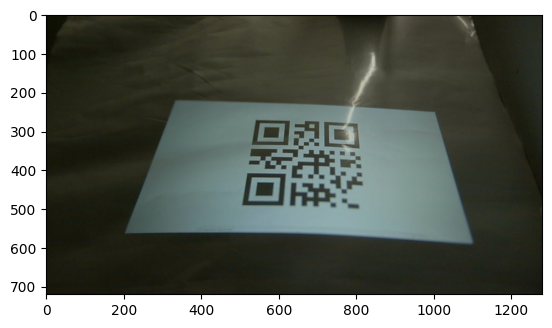

In [8]:
from matplotlib import pyplot as plt
plt.imshow(caped_frame)

In [9]:
import numpy as np

In [10]:
from pyzbar.pyzbar import decode as decode_qr, ZBarSymbol

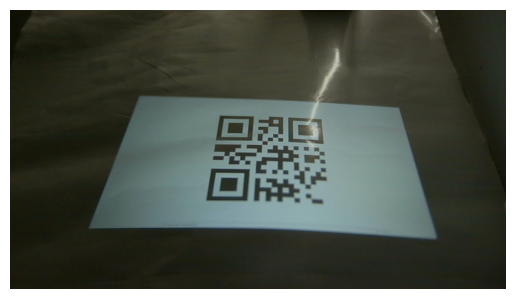

In [15]:
caped_frame_copy = caped_frame.copy()
# Convert to grayscale
# caped_frame_gray = cv2.cvtColor(caped_frame_copy, cv2.COLOR_BGR2GRAY)
# Detect QR codes in captured frame
decoded = decode_qr(caped_frame_copy, symbols=[ZBarSymbol.QRCODE])
for obj in decoded:
    print(f"Type: {obj.type}")
    print(f"Data: {obj.data.decode('utf-8')}")
    x, y, w, h = obj.rect
    cv2.rectangle(caped_frame_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(caped_frame_copy)
plt.axis('off')
plt.show()

Screen corners: [[ 334.  222.]
 [1002.  252.]
 [1101.  587.]
 [ 204.  561.]]


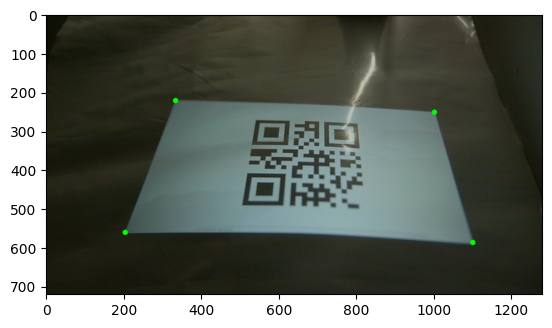

In [46]:
# Detect projector screen corners
import cv2
import numpy as np

# caped_frame_copy = caped_frame.copy()
capped_frame_copy = caped_frame_gray.copy()

# Preprocess
gray = cv2.cvtColor(caped_frame_copy, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
edged = cv2.Canny(blur, 50, 150)

plt.imshow(edged)

# Find and sort contours
cnts, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

# Look for quadrilateral
screen_corners = None
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * peri, True)
    if len(approx) == 4:
        screen_corners = approx.reshape(4, 2)
        break

if screen_corners is not None:
    # Order corners: tl, tr, br, bl
    def order_points(pts):
        rect = np.zeros((4,2), dtype='float32')
        s = pts.sum(axis=1)
        diff = np.diff(pts, axis=1)
        rect[0] = pts[np.argmin(s)]       # top-left
        rect[2] = pts[np.argmax(s)]       # bottom-right
        rect[1] = pts[np.argmin(diff)]    # top-right
        rect[3] = pts[np.argmax(diff)]    # bottom-left
        return rect

    screen_corners = order_points(screen_corners)
    print('Screen corners:', screen_corners)
    # Draw corners
    disp = caped_frame_copy.copy()
    for (x, y) in screen_corners:
        cv2.circle(disp, (int(x), int(y)), 7, (0,255,0), -1)
    
    plt.imshow(disp)
    # cv2.imshow('Screen Corners', disp)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
else:
    print('No 4-corner contour found')

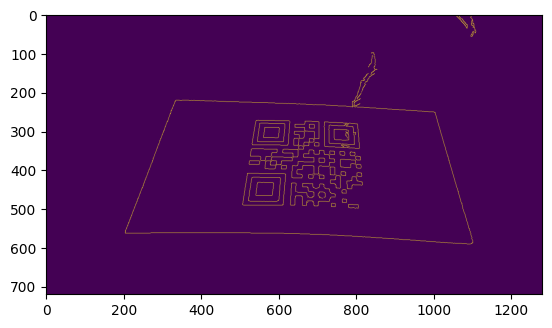

In [45]:
import cv2
import numpy as np

# caped_frame_copy = caped_frame.copy()
capped_frame_copy = caped_frame_gray.copy()

# Preprocess
gray = cv2.cvtColor(caped_frame_copy, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
edged = cv2.Canny(blur, 50, 150)

plt.imshow(edged)

In [40]:
# Find and sort contours
cnts, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

#
list_corners = []

# Look for quadrilateral
screen_corners = None
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        screen_corners = approx.reshape(4, 2)
        list_corners.append(screen_corners)

Screen corners 1: [[ 204  561]
 [ 382  221]
 [1002  252]
 [1101  587]]
Screen corners: [[ 382.  221.]
 [1002.  252.]
 [1101.  587.]
 [ 204.  561.]]


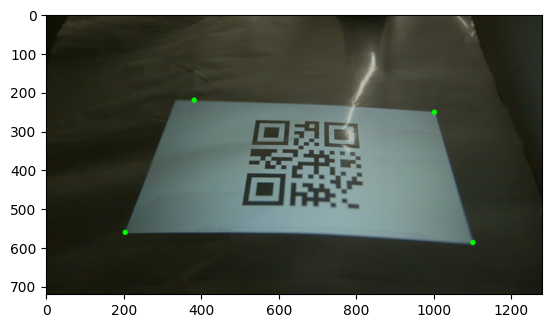

Screen corners 2: [[519 410]
 [507 490]
 [612 490]
 [618 411]]
Screen corners: [[519. 410.]
 [618. 411.]
 [612. 490.]
 [507. 490.]]


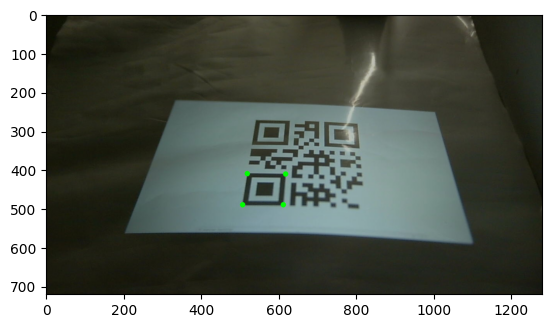

Screen corners 3: [[519 411]
 [617 411]
 [612 488]
 [509 491]]
Screen corners: [[519. 411.]
 [617. 411.]
 [612. 488.]
 [509. 491.]]


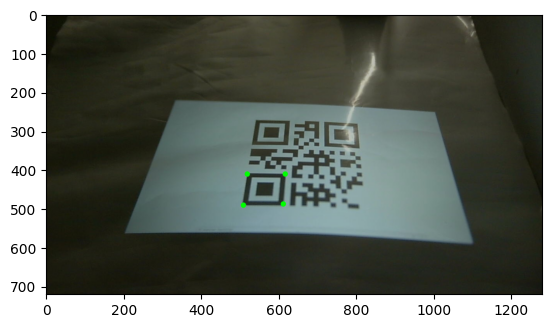

Screen corners 4: [[542 273]
 [532 336]
 [624 336]
 [627 274]]
Screen corners: [[542. 273.]
 [627. 274.]
 [624. 336.]
 [532. 336.]]


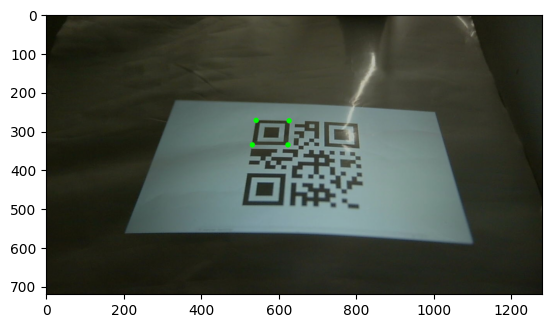

Screen corners 5: [[541 275]
 [627 274]
 [624 335]
 [533 336]]
Screen corners: [[541. 275.]
 [627. 274.]
 [624. 335.]
 [533. 336.]]


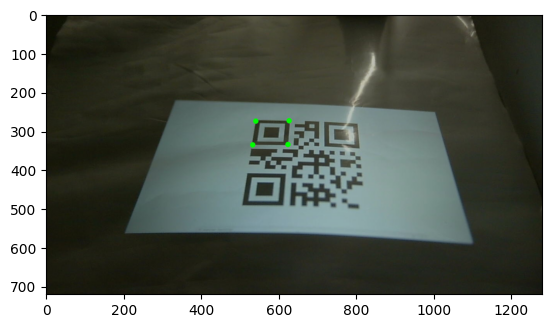

Screen corners 6: [[718 277]
 [719 340]
 [808 345]
 [803 282]]
Screen corners: [[718. 277.]
 [803. 282.]
 [808. 345.]
 [719. 340.]]


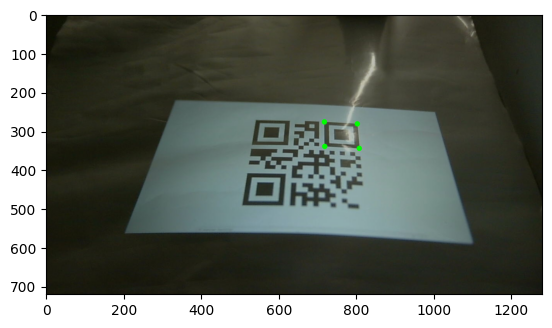

Screen corners 7: [[531 420]
 [523 480]
 [600 479]
 [603 420]]
Screen corners: [[531. 420.]
 [603. 420.]
 [600. 479.]
 [523. 480.]]


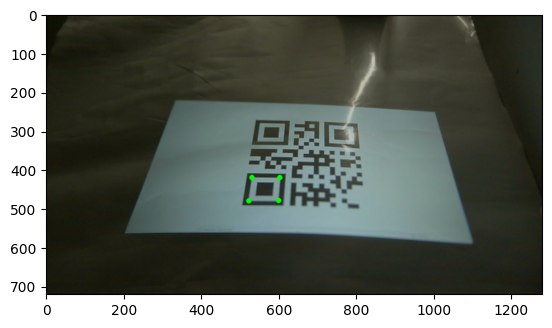

Screen corners 8: [[531 421]
 [602 420]
 [600 478]
 [524 480]]
Screen corners: [[531. 421.]
 [602. 420.]
 [600. 478.]
 [524. 480.]]


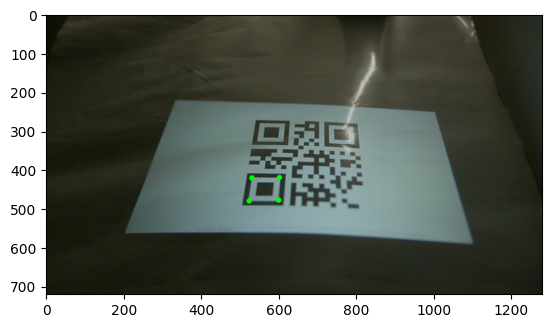

Screen corners 9: [[564 291]
 [561 317]
 [599 317]
 [600 291]]
Screen corners: [[564. 291.]
 [600. 291.]
 [599. 317.]
 [561. 317.]]


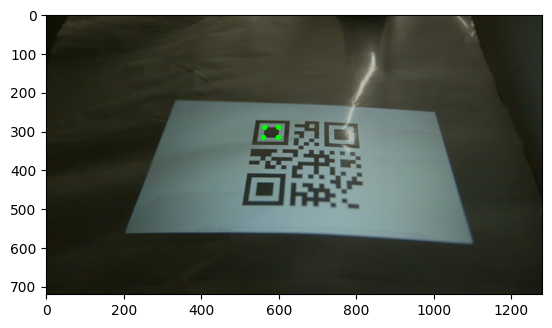

Screen corners 10: [[564 292]
 [601 292]
 [599 316]
 [562 317]]
Screen corners: [[564. 292.]
 [601. 292.]
 [599. 316.]
 [562. 317.]]


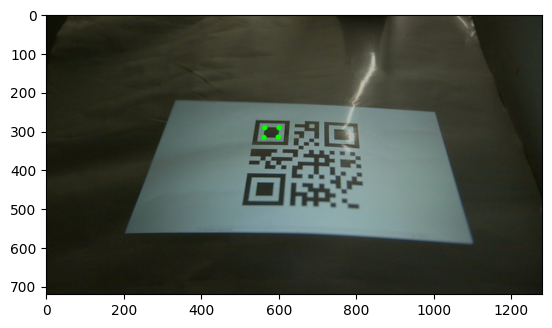

Screen corners 11: [[743 296]
 [744 322]
 [781 323]
 [779 298]]
Screen corners: [[743. 296.]
 [779. 298.]
 [781. 323.]
 [744. 322.]]


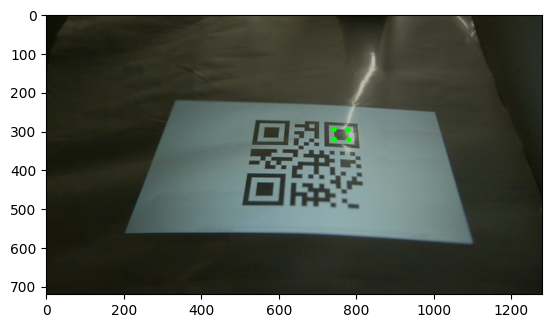

Screen corners 12: [[608 389]
 [607 398]
 [619 398]
 [620 389]]
Screen corners: [[608. 389.]
 [620. 389.]
 [619. 398.]
 [607. 398.]]


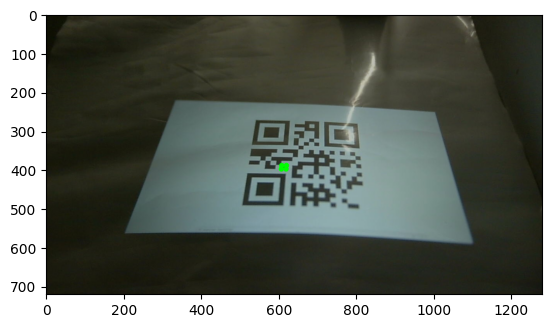

Screen corners 13: [[676 482]
 [674 484]
 [675 484]
 [675 483]]
Screen corners: [[676. 482.]
 [676. 482.]
 [675. 484.]
 [674. 484.]]


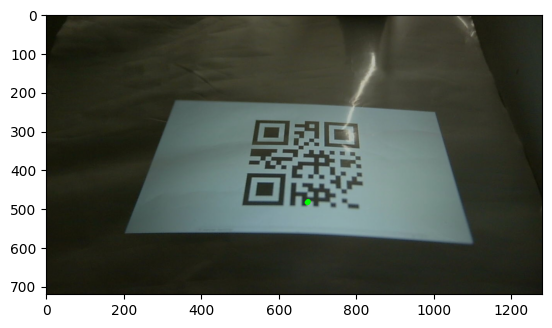

Screen corners 14: [[747 412]
 [748 413]
 [748 414]
 [748 413]]
Screen corners: [[747. 412.]
 [747. 412.]
 [748. 414.]
 [748. 414.]]


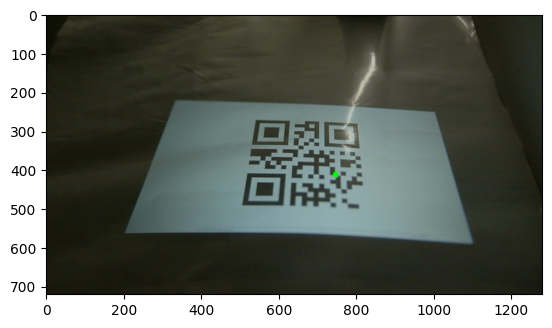

In [41]:
for i, corners in enumerate(list_corners):
    print(f"Screen corners {i+1}:", corners)
    # Order corners: tl, tr, br, bl
    def order_points(pts):
        rect = np.zeros((4,2), dtype='float32')
        s = pts.sum(axis=1)
        diff = np.diff(pts, axis=1)
        rect[0] = pts[np.argmin(s)]       # top-left
        rect[2] = pts[np.argmax(s)]       # bottom-right
        rect[1] = pts[np.argmin(diff)]    # top-right
        rect[3] = pts[np.argmax(diff)]    # bottom-left
        return rect

    screen_corners = order_points(corners)
    print('Screen corners:', screen_corners)
    # Draw corners
    disp = caped_frame_copy.copy()
    for (x, y) in screen_corners:
        cv2.circle(disp, (int(x), int(y)), 7, (0,255,0), -1)
    
    plt.imshow(disp)
    plt.show()